Data source:
https://www.kaggle.com/datasets/soheiltehranipour/co2-dataset-in-usa

In [ ]:
# plot summer vs winter values
# split year and month to be able to plot only certain months 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.interpolate import make_interp_spline as mis
import datetime as dt
from matplotlib import dates as mdates

df = pd.read_csv('co2.csv')

# convert 'YYYYMM' to datetime.
df['YYYYMM'] = pd.to_datetime(df['YYYYMM'], format='%Y%m')

# creates new columns for year and month
df['Year'] = df['YYYYMM'].dt.year
df['Month'] = df['YYYYMM'].dt.month

# rearrange columns and drop 'YYYYMM'
df.insert(0, 'Year', df.pop('Year'))
df.insert(1, 'Month', df.pop('Month'))
#df = df[['Year','Month','Value','YYYYMM']] -> this works, but not ideal for many columns
# df = df.drop('YYYYMM', axis=1)

# make date the index, limit date to year and month --> NO
#df = df.set_index('YYYYMM').to_period('M')

In [41]:
df

,Year,Month,YYYYMM,Value
0,1973,1,1973-01-01,72.076
1,1973,2,1973-02-01,64.442
2,1973,3,1973-03-01,64.084
3,1973,4,1973-04-01,60.842
4,1973,5,1973-05-01,61.798
...,...,...,...,...
518,2016,3,2016-03-01,72.840
519,2016,4,2016-04-01,71.410
520,2016,5,2016-05-01,82.510
521,2016,6,2016-06-01,115.772


In [ ]:
# try plotting just a few years to see where peaks and valleys are.

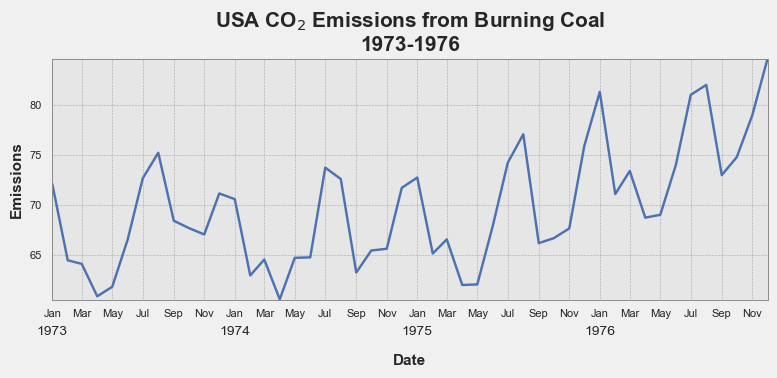

In [90]:
#plotting 73-76 to identify patterns

df_73_76 = df[df['Year'].isin([1973,1974,1975,1976])]

dates = df_73_76['YYYYMM']
emissions = df_73_76['Value']

bg_color = '#f0f0f1'
text_color = 'black'

fig, ax = plt.subplots(1, 1, figsize=(8, 4), facecolor=bg_color)

# plot
ax.plot(dates, emissions, linestyle='solid')

# ticks
fmt_month = mdates.MonthLocator(interval=2) # minor ticks for months
fmt_year = mdates.YearLocator() # minor ticks every year

ax.xaxis.set_minor_locator(fmt_month) # sets months for minor ticks
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b')) # '%b' gets names of month
ax.xaxis.set_major_locator(fmt_month) # was set to fmt_year, but dropped Jan lower than other ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# fontsize for month labels
ax.tick_params(labelsize=8, which='both')

# create second x axis below first to show year in YYYY format
lower_axis = ax.secondary_xaxis(location=-0.07)
lower_axis.xaxis.set_major_locator(fmt_year)
lower_axis.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # '%Y' gets year in YYYY format

# hide lower x axis spines and ticks
lower_axis.spines['bottom'].set_visible(False)
lower_axis.tick_params(length=0, labelsize=10)

# grid, grid background, spines
plt.grid(color='#737374', linestyle=':', linewidth=0.4)
ax.set_facecolor('#e6e6e7')
plt.setp(ax.spines.values(), color='#8a8a8b', linewidth=0.7)

# titles, legend, axis labels
plt.xlabel('Date', fontweight='bold', labelpad=25) # labelpad moves label under the all x axes
plt.ylabel('Emissions', fontweight='bold')
plt.title('USA CO$_2$ Emissions from Burning Coal\n1973-1976', fontsize=15, fontweight='bold')

plt.margins(0.001) # drops additional months from start and end. 0 starts labels at Feb, so changed to 0.001
plt.tight_layout()
# plt.savefig('US CO2 Emissions 1973-1976', facecolor=bg_color)
plt.show()

# emissions lower in cooler months because less need to heat/cool homes

In [ ]:
# filter April and Sept values as they appear to be the lowest.
# filter Jan and Jul because values are highest

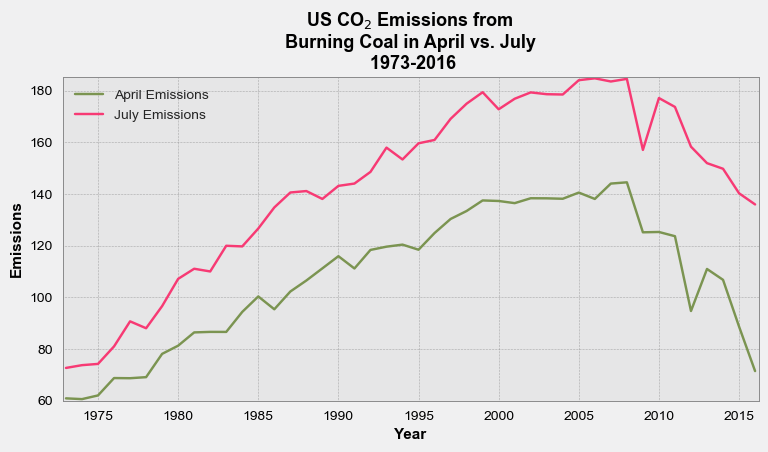

In [91]:
# plotting suspected minimums and maximums

plt.style.use('seaborn')

df_Apr = df[df['Month'].isin([4])]
df_Jul = df[df['Month'].isin([7])]

year = df_Apr['Year'] # df['Year'] has 523 values, df_Apr['Year'] for simplicity
emissions_Apr = df_Apr['Value']
emissions_Jul = df_Jul['Value']

bg_color = '#f0f0f1'
text_color = 'black'

fig, ax = plt.subplots(figsize=(8,4), facecolor=bg_color)

# data
ax.plot(year, emissions_Apr, label='April Emissions', color='#7b9451')
ax.plot(year, emissions_Jul, label='July Emissions', color='#F73A74')

# ticks
ax.tick_params(labelcolor=text_color)

# grid, grid background, spines
plt.grid(color='#737374', linestyle=':', linewidth=0.4)
ax.set_facecolor('#e6e6e7')
plt.setp(ax.spines.values(), color='#8a8a8b', linewidth=0.7)

# titles, legend, axis labels
plt.title('US CO$_2$ Emissions from \nBurning Coal in April vs. July\n 1973-2016', fontsize=13, 
          fontweight='bold', color=text_color)
plt.xlabel('Year', fontweight='bold', color=text_color)
plt.ylabel('Emissions', fontweight='bold', color=text_color)
plt.legend()

# plt.savefig('US CO2 Emissions April & July', facecolor=bg_color)
plt.margins(0.005)
plt.show()